In [1]:
### Data Science: Clustering
### Date: OCt 13, 2021
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

import warnings
warnings.filterwarnings(action="ignore")
import os
print(os.listdir("../MMF1922"))

['.ipynb_checkpoints', 'CC GENERAL.csv', 'clustering.ipynb', 'cluster_descrip.csv']


1. Data Processing

In [2]:
### EDA
data= pd.read_csv("../MMF1922/CC GENERAL.csv")
data.drop('CUST_ID', axis=1, inplace=True)    
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


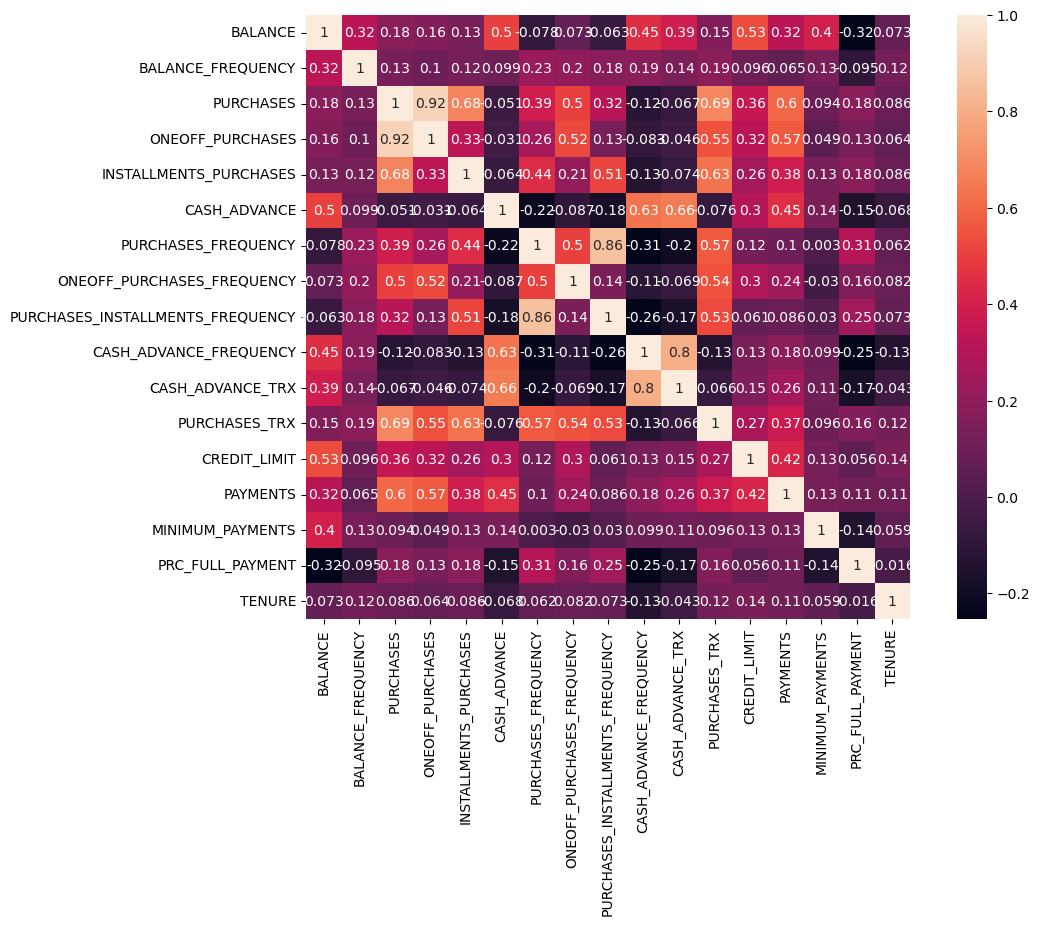

In [3]:
### correlation heatmap
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(data.corr(),cbar=True,square=True,annot=True,robust=True)
plt.show()

In [4]:
### missing data 
data.isnull().sum().sort_values(ascending=False)
#data.isna().mean()*100

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [5]:
### missing data processing
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

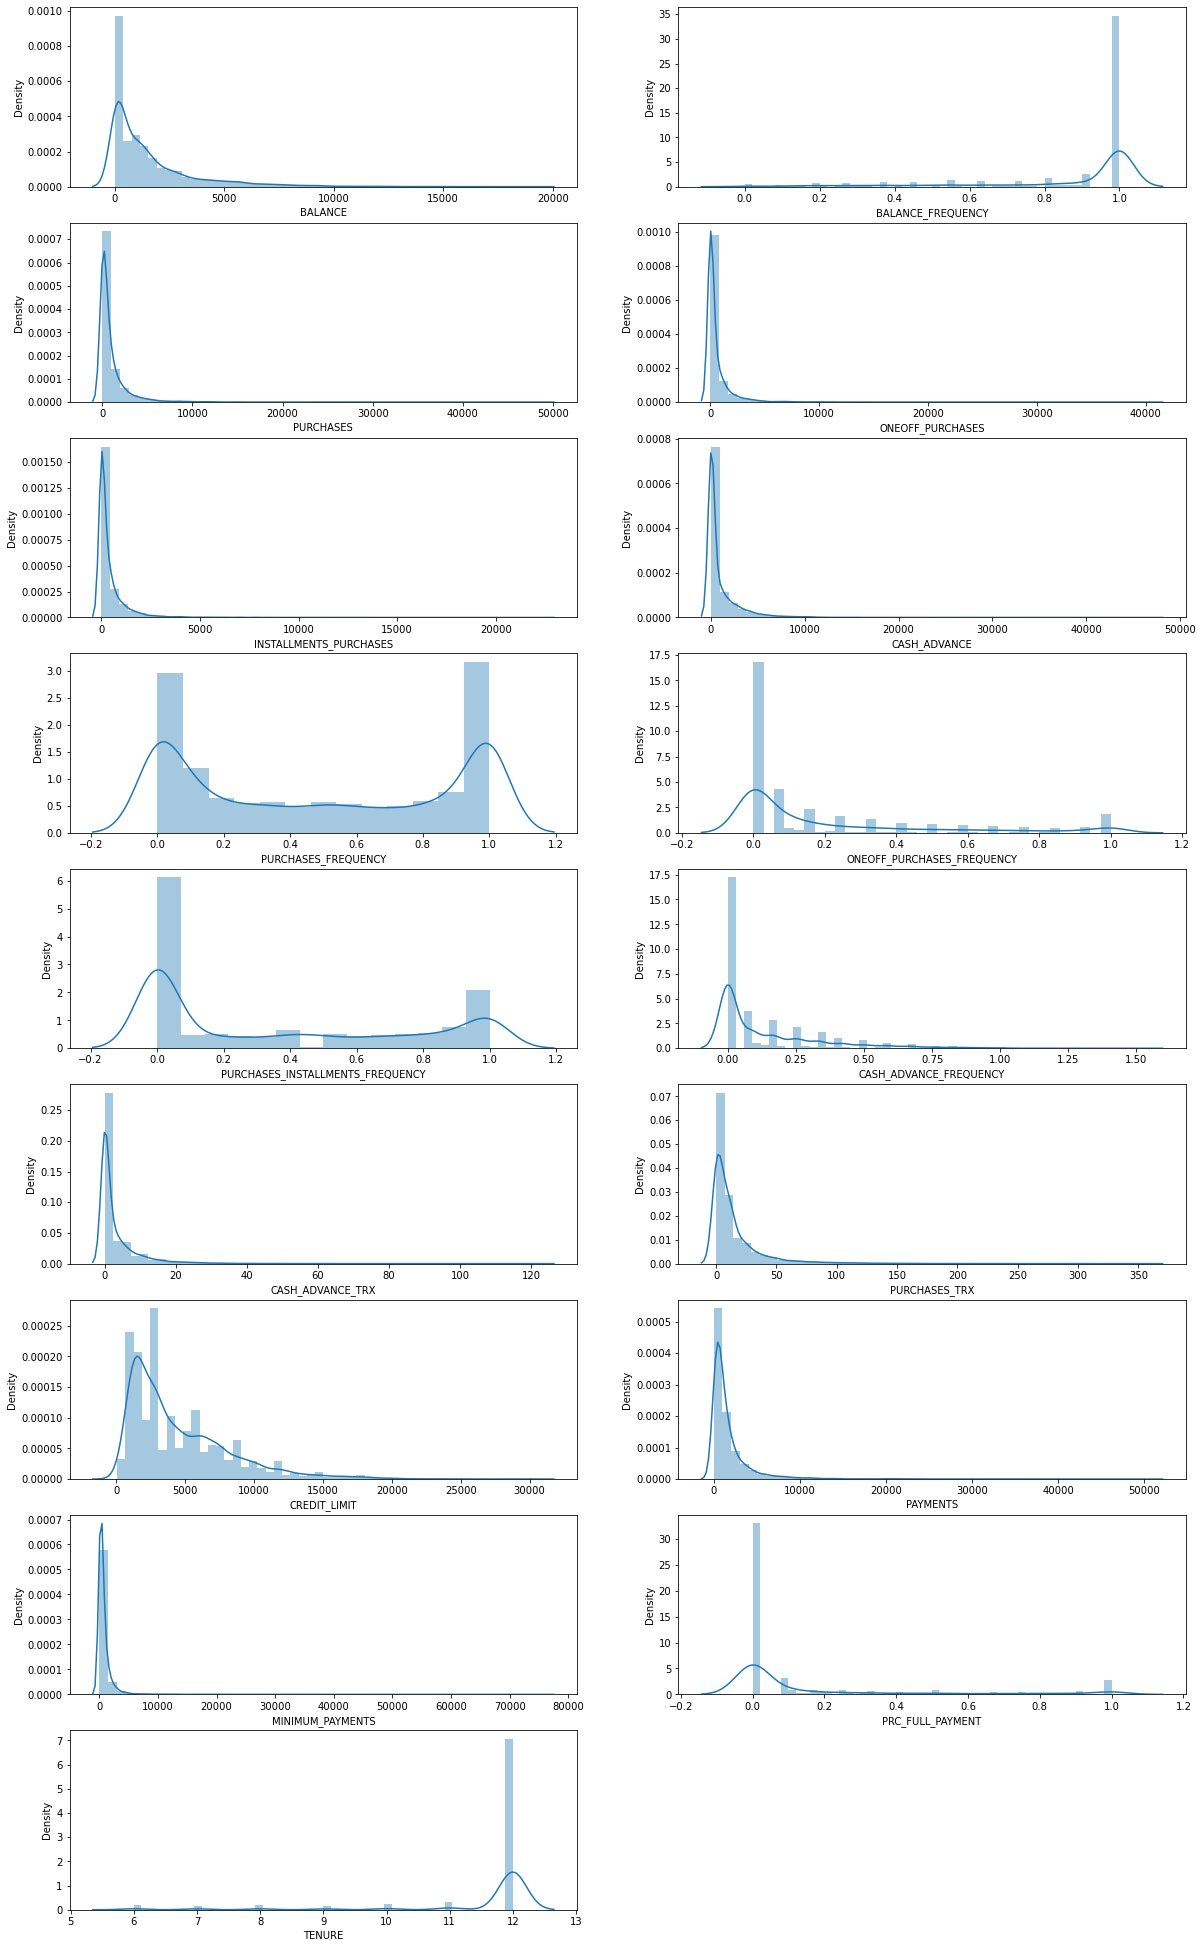

In [6]:
### the distribution of the data
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax1 = plt.subplot(9, 2, i+1)
        sns.distplot(data[col], ax = ax1)
        plt.xlabel(col)
plt.show()

In [7]:
### outliers processing
data1 = data.copy()
for c in data1:
    max3 = data1[c].median() + 3*data1[c].std()
    min3 = data1[c].median() - 3*data1[c].std()
    data1.loc[data1[c] > max3, c] = max3
    data1.loc[data1[c] < min3, c] = min3

In [8]:
### standardization
X = np.asarray(data1)
scale = StandardScaler() 
X1 = scale.fit_transform(X)

In [9]:
n_clusters = np.arange(2, 16)

2. Centroid-based clustering: k-means

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.83it/s]


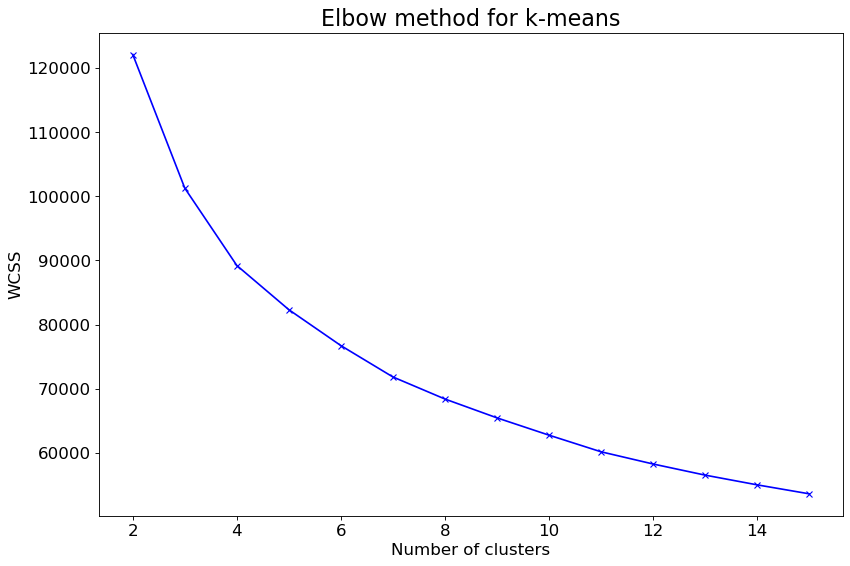

In [10]:
### elbow method
cost = []
for i in tqdm(n_clusters):
    kmean = KMeans(i)
    kmean.fit(X1)
    cost.append(kmean.inertia_)  
plt.figure(figsize=(12,8),dpi=80)
plt.plot(n_clusters,cost, 'bx-')
plt.xlabel("Number of clusters",fontsize=15)
plt.ylabel("WCSS",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Elbow method for k-means',fontsize=20)
plt.show()

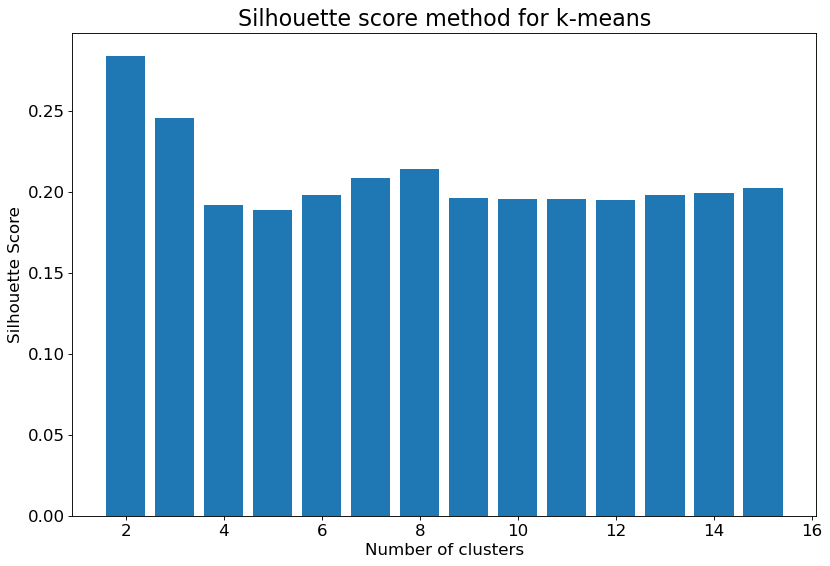

In [12]:
### silhouette_score
sscores = [] 

for n_cluster in tqdm(n_clusters):
    sscores.append(silhouette_score(X1, KMeans(n_cluster).fit_predict(X1))) 

# Plotting a bar graph to compare the results 
plt.figure(figsize=(12,8),dpi=80)
plt.bar(n_clusters, sscores)
#plt.plot(n_clusters,sscores, 'bx-')
plt.xlabel('Number of clusters', fontsize = 15) 
plt.ylabel('Silhouette Score', fontsize = 15) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Silhouette score method for k-means',fontsize=20)
plt.show() 

In [14]:
### choose k = 3
kmean = KMeans(3)
kmean.fit(X1)
labels = kmean.labels_
clusters = pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)

In [15]:
clusters.groupby('cluster').mean().T

cluster,0.0,1.0,2.0
BALANCE,955.129668,2071.551518,3065.859134
BALANCE_FREQUENCY,0.846221,0.943867,0.922727
PURCHASES,610.134370,3277.332943,467.729624
ONEOFF_PURCHASES,325.218573,2084.421531,269.837014
INSTALLMENTS_PURCHASES,285.157179,1193.012279,198.529553
CASH_ADVANCE,524.101238,663.019200,2635.315370
PURCHASES_FREQUENCY,0.464761,0.805184,0.326837
ONEOFF_PURCHASES_FREQUENCY,0.150364,0.511831,0.125117
PURCHASES_INSTALLMENTS_FREQUENCY,0.342910,0.627136,0.228800
CASH_ADVANCE_FREQUENCY,0.091335,0.085534,0.309315


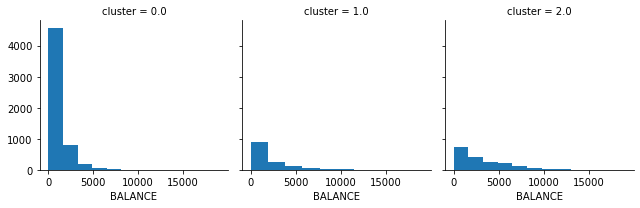

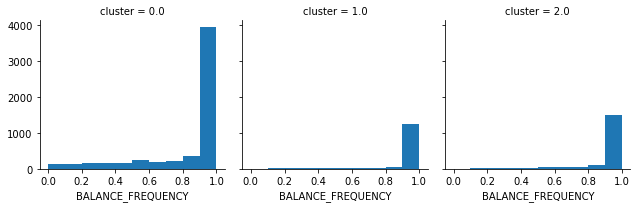

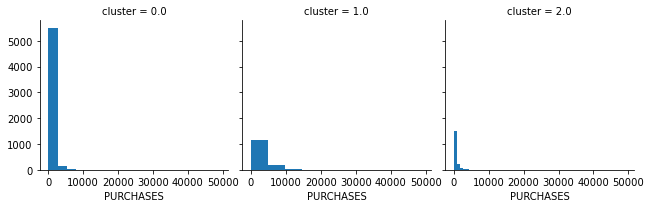

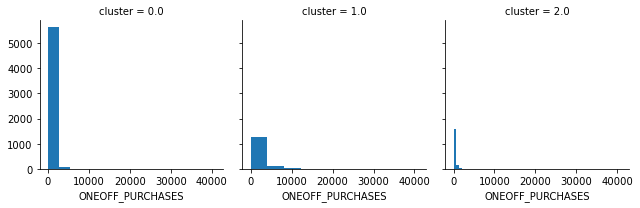

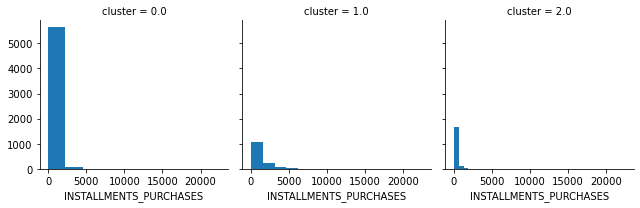

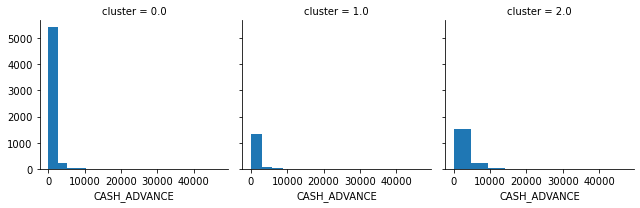

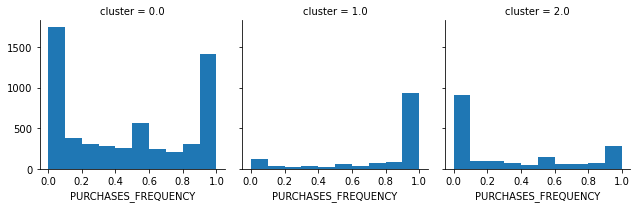

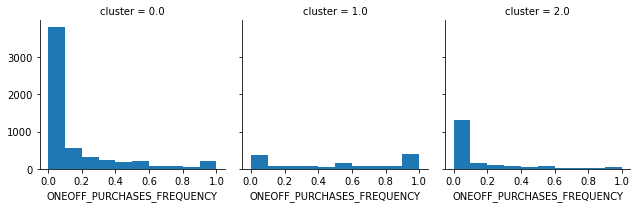

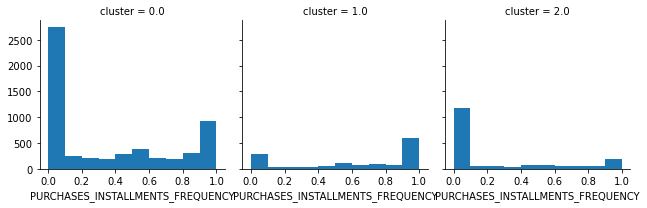

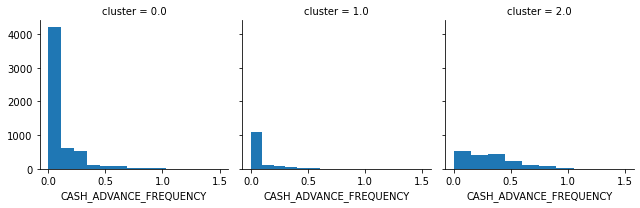

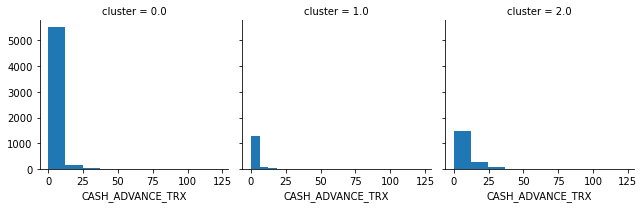

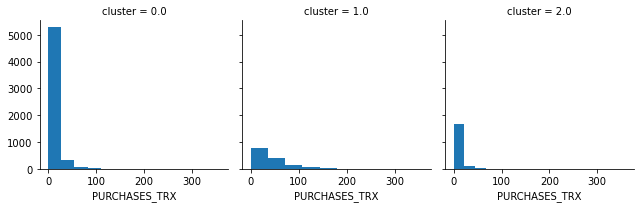

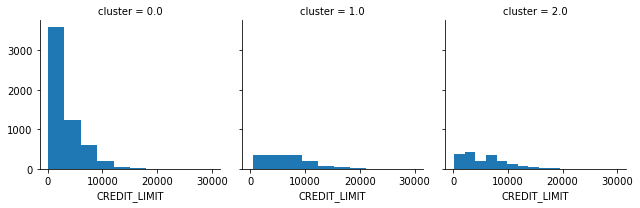

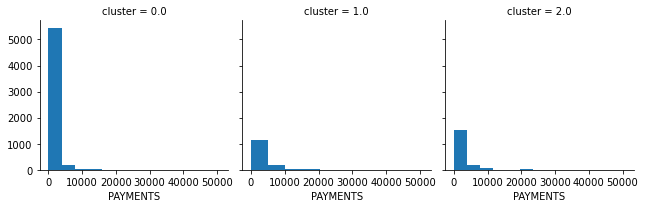

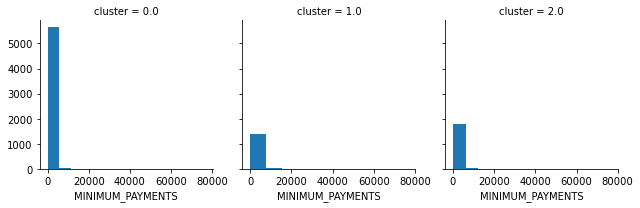

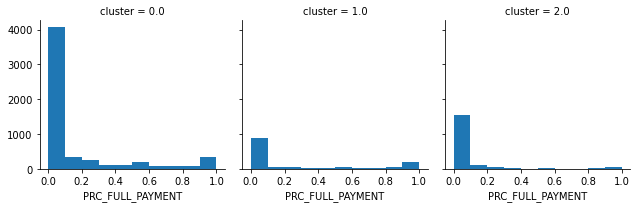

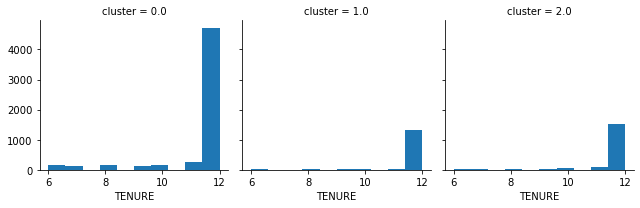

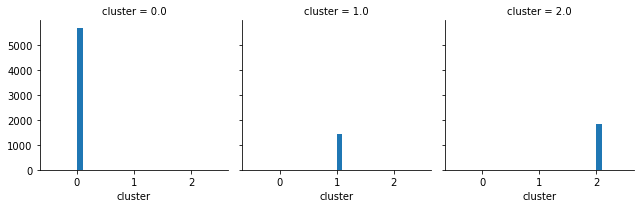

In [16]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [17]:
### using PCA for the purpose of visualization
dist = 1 - cosine_similarity(X1)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

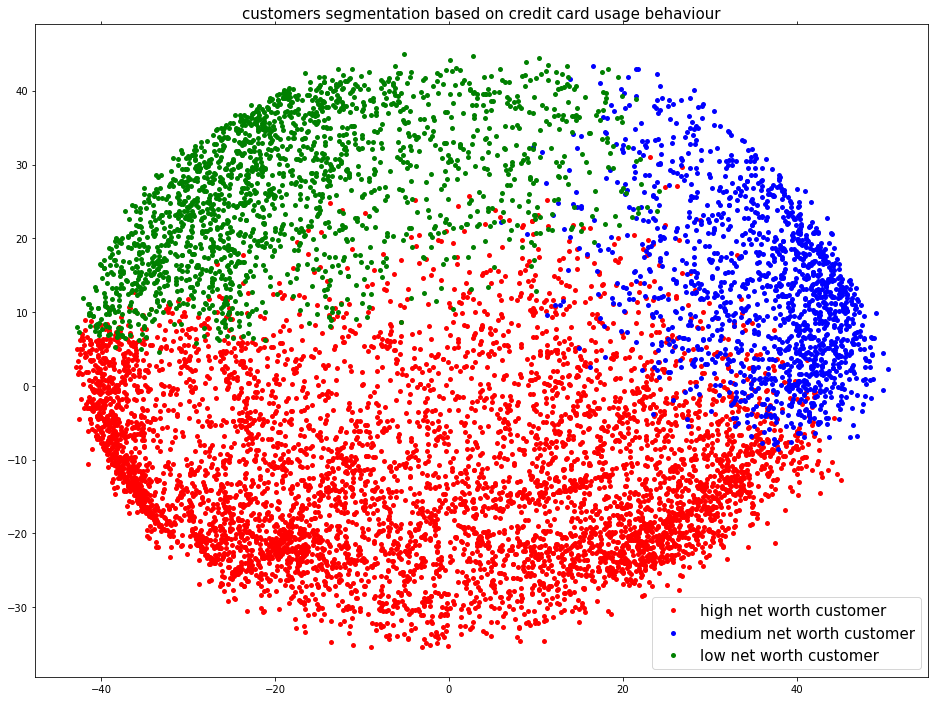

In [18]:
### visualization
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red', 1: 'blue', 2: 'green'}

###labels to be dicided
names = {0: 'high net worth customer', 1: 'medium net worth customer', 2: 'low net worth customer'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(16, 12)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(fontsize=15)
ax.set_title("customers segmentation based on credit card usage behaviour", fontsize=15)
plt.show()

3. Connectivity-based clustering: Agglomerative hierarchical clustering

In [ ]:
### dendrogram
plt.figure(figsize=(10, 10),dpi=80)
plt.title('Visualising the clustering process') 
Dendrogram = shc.dendrogram((shc.linkage(X1, method ='ward'))) 
plt.show()

In [ ]:
### silhouette_score
sscores2 = [] 

for n_cluster in tqdm(n_clusters):
    sscores2.append(silhouette_score(X1, AgglomerativeClustering(n_cluster).fit_predict(X1))) 

# Plotting a bar graph to compare the results 
plt.figure(figsize=(12,8),dpi=80)
plt.bar(n_clusters, sscores2)
plt.xlabel('Number of clusters', fontsize = 15) 
plt.ylabel('Silhouette Score', fontsize = 15) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Silhouette score method for agglomerative clustering',fontsize=20)
plt.show() 

In [ ]:
### choose k = 3
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X1)
labels2 = agg.labels_
clusters2 = pd.concat([data, pd.DataFrame({'cluster':labels2})], axis=1)

In [ ]:
for c in clusters2:
    grid = sns.FacetGrid(clusters2, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
clusters2.groupby('cluster').mean().T

In [ ]:
colors2 = {0: 'red',1: 'blue', 2: 'green'}
#, 3: 'yellow', 4: 'orange',  5:'purple'}

###labels to be dicided
names2 = {0: 'high net worth customer', 1: 'medium net worth customer', 2: 'low net worth customer'}
  
df2 = pd.DataFrame({'x':x, 'y':y, 'label':labels2}) 
groups2 = df2.groupby('label')

fig2, ax2 = plt.subplots(figsize=(16, 12)) 

for name, group in groups2:
    ax2.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors2[name],label=names2[name], mec='none')
    ax2.set_aspect('auto')
    ax2.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax2.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax2.legend(fontsize=15)
ax2.set_title("Customers Segmentation based on their Credit Card usage behaviour.",fontsize=15)
plt.show()

4. Distribution-based clustering: Gaussian Mixture Models Clustering

In [ ]:
def SelBest(arr, X):
    '''
    returns the set of X configurations with shorter distance
    '''
    dx = np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
'''
n_clusters = np.arange(2, 16)
sils = []
sils_err = []
iterations = 20
for n in tqdm(n_clusters):
    tmp_sil = []
    for _ in range(iterations):
        gmm = GaussianMixture(n, n_init=2).fit(X1) 
        labels = gmm.predict(X1)
        sil = metrics.silhouette_score(X1, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()
'''

In [ ]:
### Silhouette score 
sscores3 = [] 

for n_cluster in tqdm(n_clusters):
    sscores3.append(silhouette_score(X1,GaussianMixture(n_cluster).fit_predict(X1))) 

# Plotting a bar graph to compare the results 
plt.figure(figsize=(12,8),dpi=80)
plt.bar((n_clusters), sscores3) 
plt.xlabel('Number of clusters', fontsize = 15) 
plt.ylabel('Silhouette Score', fontsize = 15) 
plt.show() 

In [ ]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [ ]:
'''
n_clusters = np.arange(2, 16)
iterations = 20
results = []
res_sigs = []
for n in tqdm(n_clusters):
    dist = []
    
    for iteration in range(iterations):
        train, test = train_test_split(X1, test_size=0.5)
        
        gmm_train = GaussianMixture(n).fit(train) 
        gmm_test = GaussianMixture(n).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec = SelBest(np.array(dist), int(iterations/5))
    result = np.mean(selec)
    res_sig = np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)   
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("Distance", fontsize=15)
plt.show()
'''

In [ ]:
### Distance between GMMs using Jensen–Shannon divergence
distance = []
for n_cluster in tqdm(n_clusters):
    train, test = train_test_split(X1, test_size=0.5)  
    gmm_train = GaussianMixture(n_cluster).fit(train) 
    gmm_test = GaussianMixture(n_cluster).fit(test) 
    distance.append(gmm_js(gmm_train, gmm_test))    

In [ ]:
plt.figure(figsize=(12,8),dpi=80)
plt.plot(n_clusters, distance)
plt.title("Distance between Train and Test GMMs", fontsize=15)
##plt.xticks(n_clusters)
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("Distance", fontsize=15)
plt.show()

In [ ]:
'''
bics = []
bics_err = []
for n in tqdm(n_clusters):
    tmp_bic = []
    for _ in range(iterations):
        gmm = GaussianMixture(n).fit(X1) 
        tmp_bic.append(gmm.bic(X1))
    val = np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err = np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)
    
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.legend()

plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters", fontsize=15)
plt.ylabel("grad(BIC)", fontsize=15)
plt.legend()
'''

In [ ]:
### Bayesian information criterion (BIC)
bics = []
for n_cluster in tqdm(n_clusters):
    gmm = GaussianMixture(n_cluster).fit(X1) 
    bics.append(gmm.bic(X1))    

In [ ]:
plt.figure(figsize=(12,8),dpi=80)
plt.plot(n_clusters, bics, label='BIC')
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("BIC scores", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('BIC method for Gaussian mixture clustering',fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(12,8),dpi=80)
plt.plot(n_clusters, np.gradient(bics), label='BIC')
plt.title("Gradient of BIC Scores", fontsize=15)
#plt.xticks(n_clusters)
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("grad(BIC)", fontsize=15)
plt.show()

In [ ]:
### choose k=3
gmm = GaussianMixture(n_components = 3) 
labels3 = gmm.fit_predict(X1)
clusters3 = pd.concat([data, pd.DataFrame({'cluster':labels3})], axis=1)

In [ ]:
for c in clusters3:
    grid = sns.FacetGrid(clusters3, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
clusters3.groupby('cluster').mean().T

In [ ]:
colors3 = {0: 'red',1: 'blue', 2: 'green'}
#, 3: 'yellow', 4: 'orange',  5:'purple'}

###labels to be dicided
names3 = {0: 'high net worth customer', 1: 'medium net worth customer', 2: 'low net worth customer'}
  
df3 = pd.DataFrame({'x':x, 'y':y, 'label':labels3}) 
groups3 = df3.groupby('label')

fig3, ax3 = plt.subplots(figsize=(16, 12)) 

for name, group in groups3:
    ax3.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors3[name],label=names3[name], mec='none')
    ax3.set_aspect('auto')
    ax3.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax3.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax3.legend(fontsize=15)
ax3.set_title("Customers Segmentation based on their Credit Card usage behaviour",fontsize=15)
plt.show()